In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Let's load the Nashville zipcode data and look at the first few rows

In [21]:
bikeways = gpd.read_file('../data/bikeways_view/bikeways.shp')
bikeways.head()

BikewayTyp     Status        OnStreetNa        FromStreet  \
0        WOL   Complete          Broadway         3rd Ave S   
1         BL   Complete       Division St  Buddy Killen Cir   
2        PBL   Complete        12th Ave S      Lawrence Ave   
3         BL   Complete  Fort Negley Blvd       Chestnut St   
4        SSR  Completed           Gale Ln      Belmont Blvd   

             ToStreetNa  YearComple    District  \
0             1st Ave S        2011          19   
1            Music Sq E        2004          19   
2           Division St        2023  17, 18, 19   
3          Hamilton Ave        2014          17   
4  975' SW of 8th Ave S        2024      17, 18   

                                            geometry  
0  LINESTRING (1739913.579 666640.867, 1739440.87...  
1  LINESTRING (1734705.966 663020.082, 1734702.44...  
2  LINESTRING (1736945.240 662599.313, 1736876.29...  
3  LINESTRING (1739441.150 659321.924, 1739389.44...  
4  LINESTRING (1739156.718 650393.902, 1739133.81...

In [22]:
type(bikeways)

geopandas.geodataframe.GeoDataFrame

Now let's look at the difference between calling the first geometry variable....

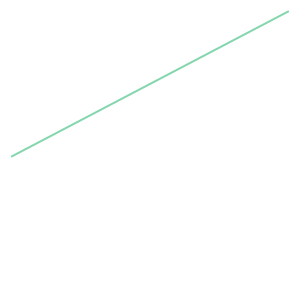

In [23]:
bikeways.loc[0, 'geometry']

In [24]:
print(bikeways.loc[0, 'geometry'])

LINESTRING (1739913.5791138858 666640.8672374785, 1739440.8756629676 666393.0419457257)


<Axes: >

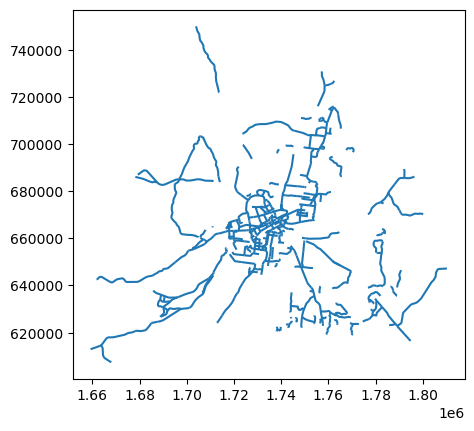

In [26]:
bikeways.plot()

Add information and styling

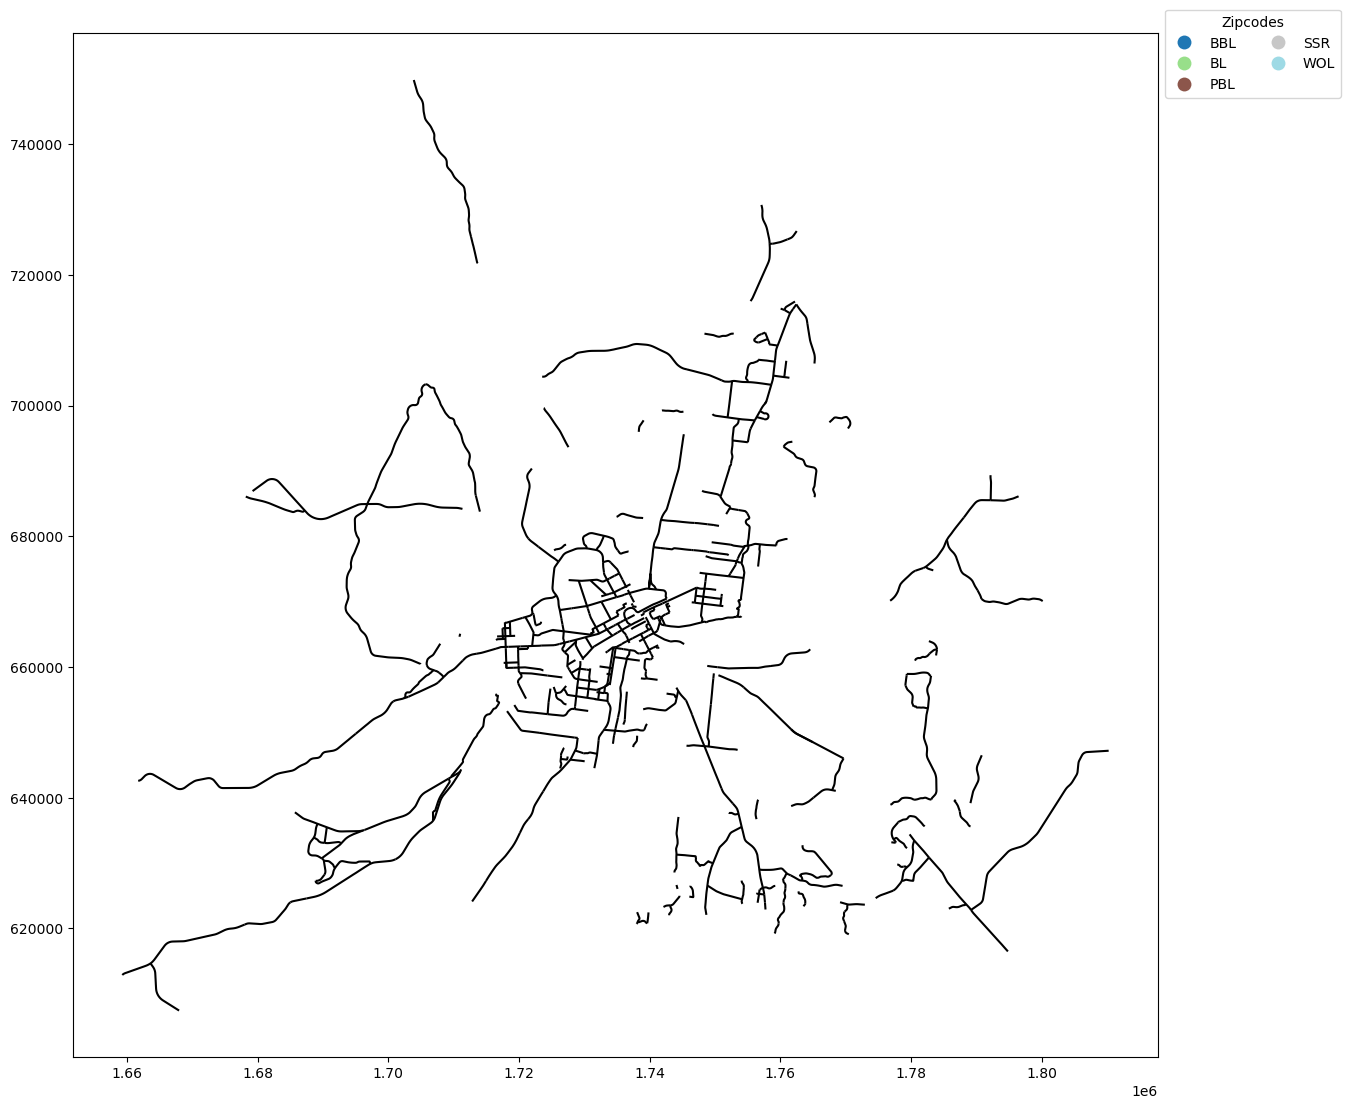

In [34]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

bikeways.plot(column = 'BikewayTyp', 
              figsize=(14, 14),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'tab20')
plt.show()

In [41]:
import folium

# Ensure correct CRS
if bikeways.crs is None:
    bikeways = bikeways.set_crs(epsg=4326)
else:
    bikeways = bikeways.to_crs(epsg=4326)

# Center map
center = [
    bikeways.geometry.centroid.y.mean(),
    bikeways.geometry.centroid.x.mean()
]

m = folium.Map(location=center, zoom_start=12, tiles="CartoDB Positron")

folium.GeoJson(bikeways).add_to(m)

m

C:\Users\matth\AppData\Local\Temp\ipykernel_17792\1478817401.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bikeways.geometry.centroid.y.mean(),
C:\Users\matth\AppData\Local\Temp\ipykernel_17792\1478817401.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bikeways.geometry.centroid.x.mean()


Next you will read in the Bike_Racks data

In [52]:
bike_racks = gpd.read_file("../data/Bike_Racks/Bike_Racks.shp")
bike_racks = bike_racks.to_crs(epsg=4326)
bike_racks.head()

FeatureTyp  Domain    Status  Quantity               Location  Capacity  \
0       Rack  Public  Existing         1                   Mall        12   
1       Rack  Public  Existing         2               Greenway         4   
2       Rack  Public  Existing         1          Park/Greenway         5   
3          W  Public  Existing         3  Park/Community Center        15   
4       Rack  Public  Existing         1          Park/Greenway         5   

                                          SiteDescri      Latitude  Longitude  \
0                                Hickory Hollow Mall  3.604993e+01 -86.655453   
1    Stones River Greenway - Donelson/Hermitage Area  3.618539e+01 -86.634297   
2  Two Rivers Golf Course, Stones River Greenway ...  3.618771e+01 -86.686700   
3                       East Park & Community Center  4.324378e+06 -86.762119   
4                     Shelby Bottoms Park & Greenway  3.616675e+01 -86.724939   

  Address  ... ZipCode                              GlobalID  \
0    None  ...    None  e8b0b070-851a-4956-b17f-5f43e5cf8bd5   
1    None  ...    None  a0c064c0-45c2-4066-aeb8-b0d6ee1aa74e   
2    None  ...    None  d4c99937-d9e6-4c95-be94-f22bfb39ad13   
3    None  ...    None  4b86ddc5-9257-4783-8ed1-5b18fd73d490   
4    None  ...    None  aa4e04f7-74b3-4997-ab9d-d93e726422e2   

          created_us  created_da         last_edite  last_edi_1      AssetID  \
0  NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00001   
1  NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00002   
2  NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00003   
3  NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00004   
4  NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00005   

  Security_F OBJECTID                    geometry  
0       None        1  POINT (-86.65545 36.04993)  
1       None        2  POINT (-86.63406 36.18528)  
2       None        3  POINT (-86.68653 36.18755)  
3         TP        4  POINT (-86.76218 36.17245)  
4       None        5  POINT (-86.72476 36.16659)  

[5 rows x 21 columns]

<Axes: >

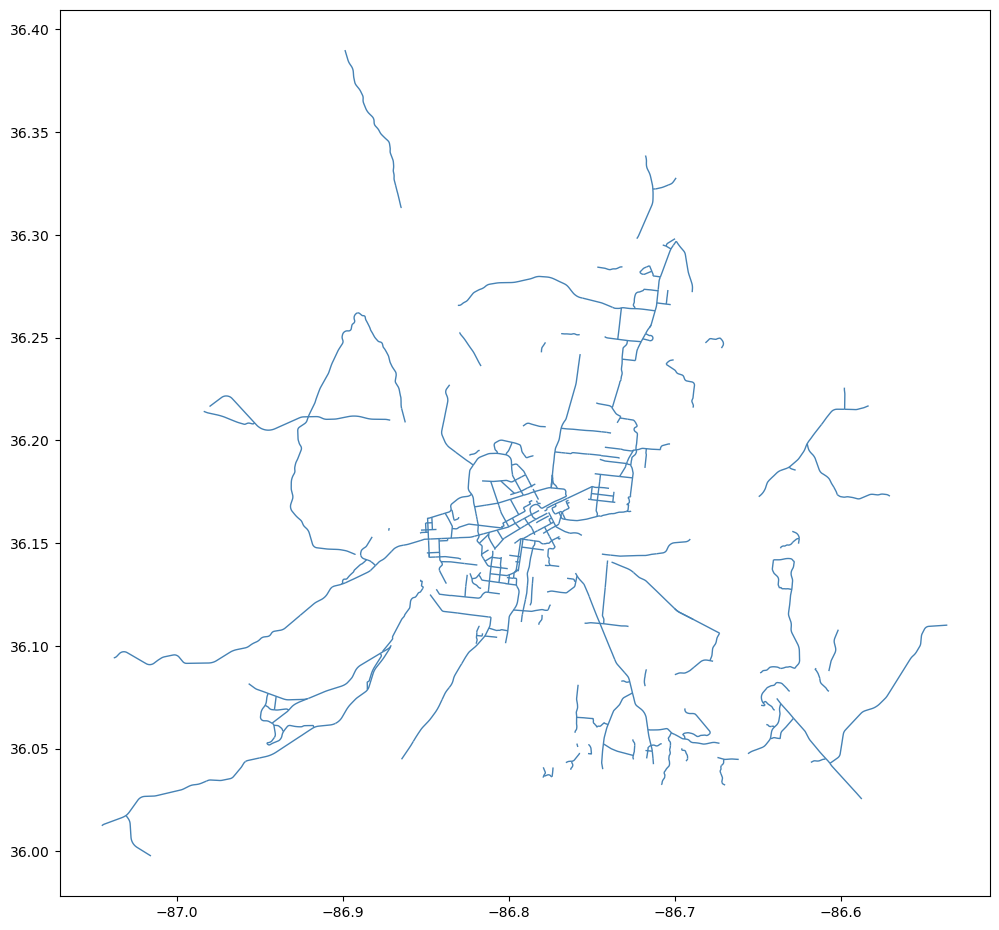

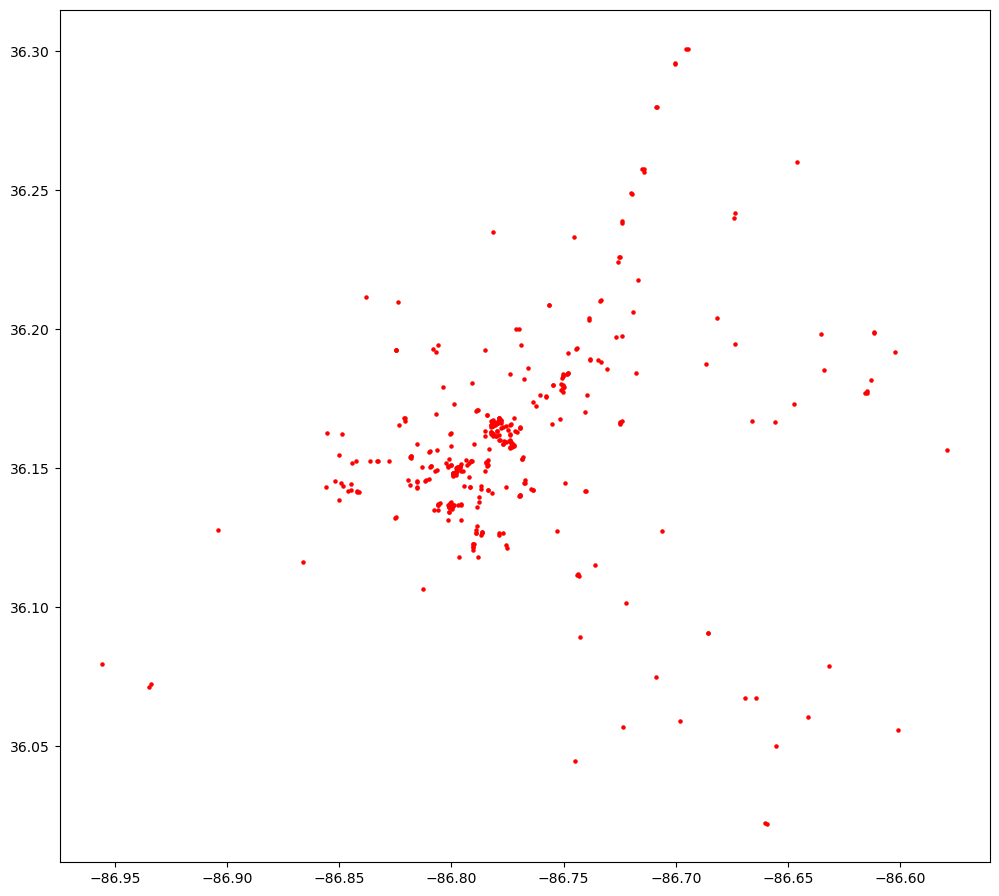

In [55]:
# for bikeways
bikeways.plot(
    figsize=(12, 12),
    linewidth=1,
    color="steelblue"
)

#for bike racks
bike_racks.plot(
    figsize=(12, 12),
    markersize=5,
    color="red"
)

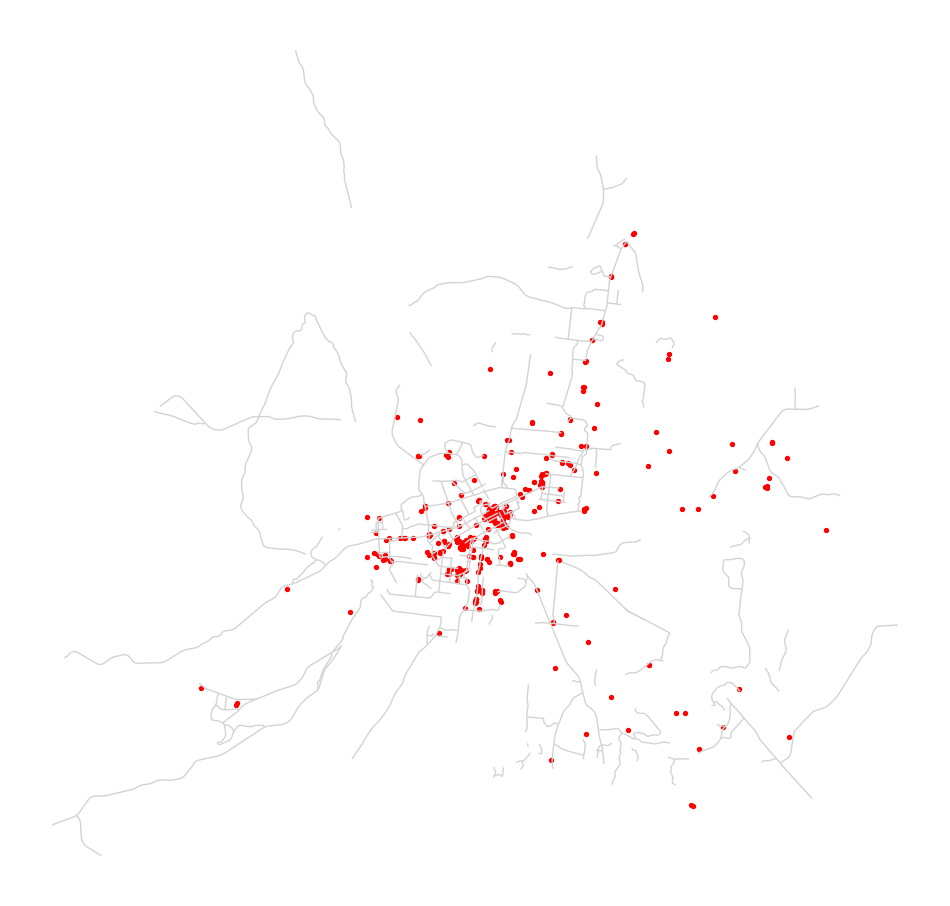

In [56]:
# for an overlay map
ax = bikeways.plot(figsize=(12, 12), linewidth=1, color="lightgray")
bike_racks.plot(ax=ax, color="red", markersize=8)
ax.set_axis_off()

In [58]:
# convert to lat/lon for Folium
bikeways = bikeways.to_crs(epsg=4326)
bike_racks = bike_racks.to_crs(epsg=4326)

# map center
center = [
    bikeways.geometry.centroid.y.mean(),
    bikeways.geometry.centroid.x.mean()
]

# base map
m = folium.Map(location=center, zoom_start=12, tiles="CartoDB Positron")

# add bikeways
folium.GeoJson(bikeways, name="Bikeways").add_to(m)

# add bike racks
folium.GeoJson(bike_racks, name="Bike Racks").add_to(m)

# layer toggle
folium.LayerControl().add_to(m)

# show map
m

C:\Users\matth\AppData\Local\Temp\ipykernel_17792\112002036.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bikeways.geometry.centroid.y.mean(),
C:\Users\matth\AppData\Local\Temp\ipykernel_17792\112002036.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bikeways.geometry.centroid.x.mean()


In [59]:
# buffer bikeways by ~20 meters
bikeways_buffered = bikeways.to_crs(3857).buffer(20).to_crs(4326)

# convert buffer back to GeoDataFrame
bikeways_buffered = gpd.GeoDataFrame(geometry=bikeways_buffered, crs=4326)

# spatial join: racks within 20m of a bikeway
racks_near_bikeways = gpd.sjoin(
    bike_racks,
    bikeways_buffered,
    how="inner",
    predicate="within"
)

racks_near_bikeways.head()

FeatureTyp   Domain    Status  Quantity     Location  Capacity  \
7                    B   Public  Existing         1     Bus Stop         2   
11                   B   Public  Existing         4     Bus Stop         8   
12                Rack   Public  Existing         2     Bus Stop         4   
78  Minimal Front Tire  Private  Existing         1  High School        54   
90                Rack   Public  Existing         1     Bus Stop         2   

                                           SiteDescri      Latitude  \
7   Bus Stop; Church St at 5th Ave N, Fifth Third ...  4.323137e+06   
11               Bus Stop; Demonbreun St at 2nd Ave S  4.322636e+06   
12               Bus Stop; Demonbreun St at 2nd Ave S  3.615996e+01   
78                              Cavert Jr High School  3.613489e+01   
90                   Bus Stop; Gallatin Pk at Home Rd  3.621046e+01   

    Longitude Address  ...                              GlobalID  \
7  -86.779767    None  ...  d0b38ab7-3ee6-4059-bc59-414a659dec15   
11 -86.773972    None  ...  d731e298-1720-4e21-88e0-e69d02b4acdc   
12 -86.774125    None  ...  18ef403b-514b-4d9f-8c74-97cdacc3aff1   
78 -86.807583    None  ...  daa8878f-b03a-4d53-8ae4-f7e7e1c1b2e5   
90 -86.733547    None  ...  579f020f-518f-438a-804e-79676a8c4570   

           created_us  created_da         last_edite  last_edi_1      AssetID  \
7   NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00008   
11  NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00012   
12  NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00013   
78  NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00079   
90  NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00091   

   Security_F OBJECTID                    geometry  index_right  
7          OP        8  POINT (-86.77974 36.16345)          475  
11         OP       12  POINT (-86.77374 36.15982)           55  
12       None       13  POINT (-86.77391 36.15980)           55  
78  One Point       79  POINT (-86.80758 36.13489)           20  
90       None       91  POINT (-86.73355 36.21046)          365  

[5 rows x 22 columns]

<Axes: >

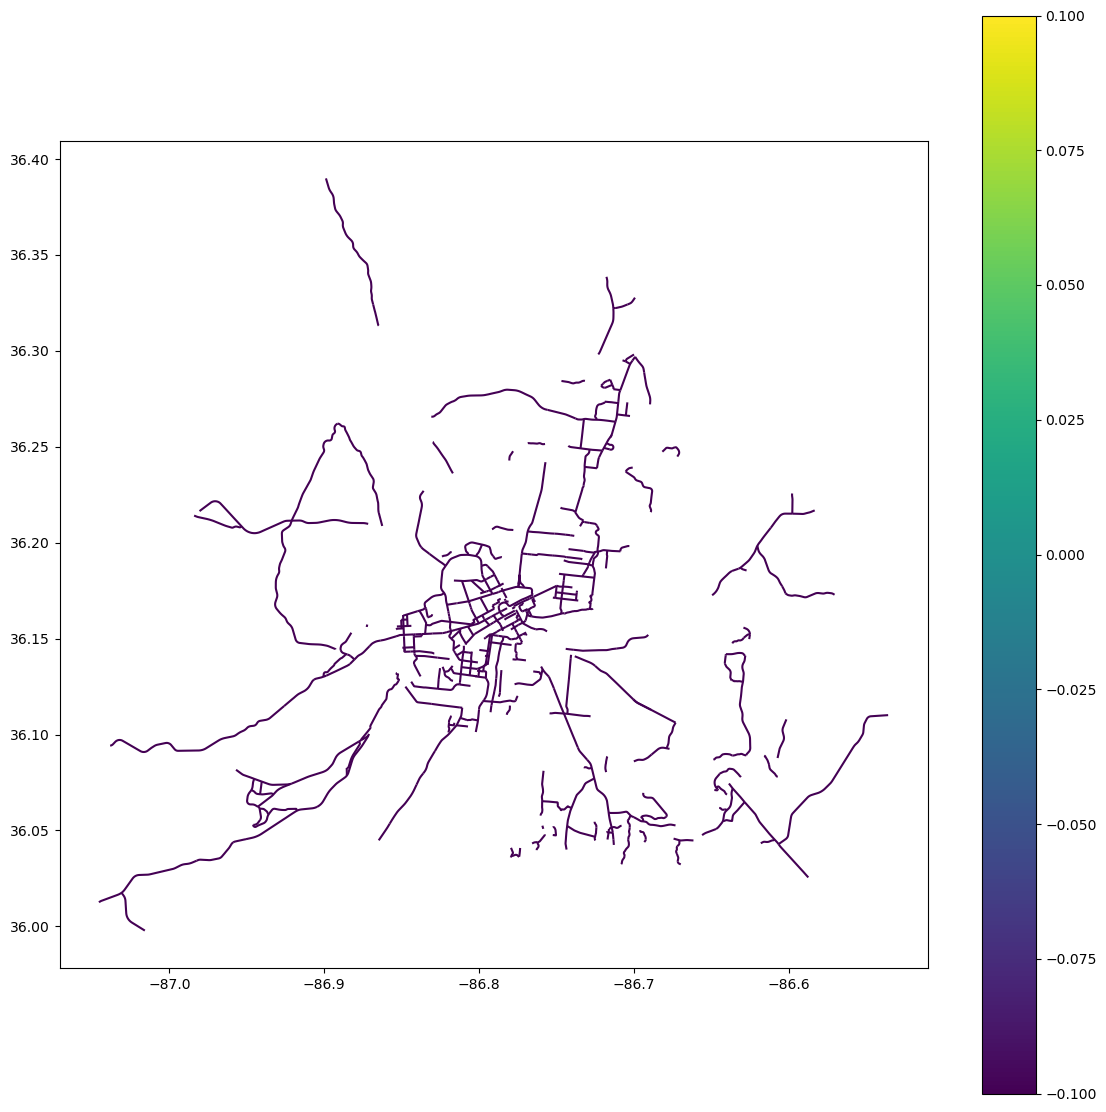

In [61]:
# count racks per bikeway segment
rack_counts = gpd.sjoin(
    bike_racks,
    bikeways,
    how="left",
    predicate="intersects"
).groupby("index_right").size()

rack_counts.head()

bikeways["rack_count"] = rack_counts
bikeways["rack_count"] = bikeways["rack_count"].fillna(0)

bikeways.plot(
    column="rack_count",
    cmap="viridis",
    figsize=(14, 14),
    legend=True
)

In [64]:
# buffer bikeways for proximity check
bikeways_buffer = bikeways.to_crs(3857).buffer(20).to_crs(4326) # to_crs(3857) converts the units of the coordinates from degrees to meters
# to_crs(4326) converts the coordinates from x/y meters in a local projected map to a lat/lng degrees format

# convert buffer to GeoDataFrame
bikeways_buffer = gpd.GeoDataFrame(geometry=bikeways_buffer, crs=4326)

# spatial join: racks near bikeways
racks_near = gpd.sjoin(
    bike_racks,
    bikeways_buffer,
    how="inner",
    predicate="within"
)

racks_near.head()

FeatureTyp   Domain    Status  Quantity     Location  Capacity  \
7                    B   Public  Existing         1     Bus Stop         2   
11                   B   Public  Existing         4     Bus Stop         8   
12                Rack   Public  Existing         2     Bus Stop         4   
78  Minimal Front Tire  Private  Existing         1  High School        54   
90                Rack   Public  Existing         1     Bus Stop         2   

                                           SiteDescri      Latitude  \
7   Bus Stop; Church St at 5th Ave N, Fifth Third ...  4.323137e+06   
11               Bus Stop; Demonbreun St at 2nd Ave S  4.322636e+06   
12               Bus Stop; Demonbreun St at 2nd Ave S  3.615996e+01   
78                              Cavert Jr High School  3.613489e+01   
90                   Bus Stop; Gallatin Pk at Home Rd  3.621046e+01   

    Longitude Address  ...                              GlobalID  \
7  -86.779767    None  ...  d0b38ab7-3ee6-4059-bc59-414a659dec15   
11 -86.773972    None  ...  d731e298-1720-4e21-88e0-e69d02b4acdc   
12 -86.774125    None  ...  18ef403b-514b-4d9f-8c74-97cdacc3aff1   
78 -86.807583    None  ...  daa8878f-b03a-4d53-8ae4-f7e7e1c1b2e5   
90 -86.733547    None  ...  579f020f-518f-438a-804e-79676a8c4570   

           created_us  created_da         last_edite  last_edi_1      AssetID  \
7   NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00008   
11  NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00012   
12  NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00013   
78  NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00079   
90  NashvilleOpenData  2025-06-26  NashvilleOpenData  2025-06-26  BRACK-00091   

   Security_F OBJECTID                    geometry  index_right  
7          OP        8  POINT (-86.77974 36.16345)          475  
11         OP       12  POINT (-86.77374 36.15982)           55  
12       None       13  POINT (-86.77391 36.15980)           55  
78  One Point       79  POINT (-86.80758 36.13489)           20  
90       None       91  POINT (-86.73355 36.21046)          365  

[5 rows x 22 columns]

In [65]:
# count racks per bikeway segment
rack_counts = gpd.sjoin(
    bike_racks,
    bikeways,
    how="left",
    predicate="intersects"
).groupby("index_right").size()

# add counts to bikeways
bikeways["rack_count"] = rack_counts
bikeways["rack_count"] = bikeways["rack_count"].fillna(0)

<Axes: >

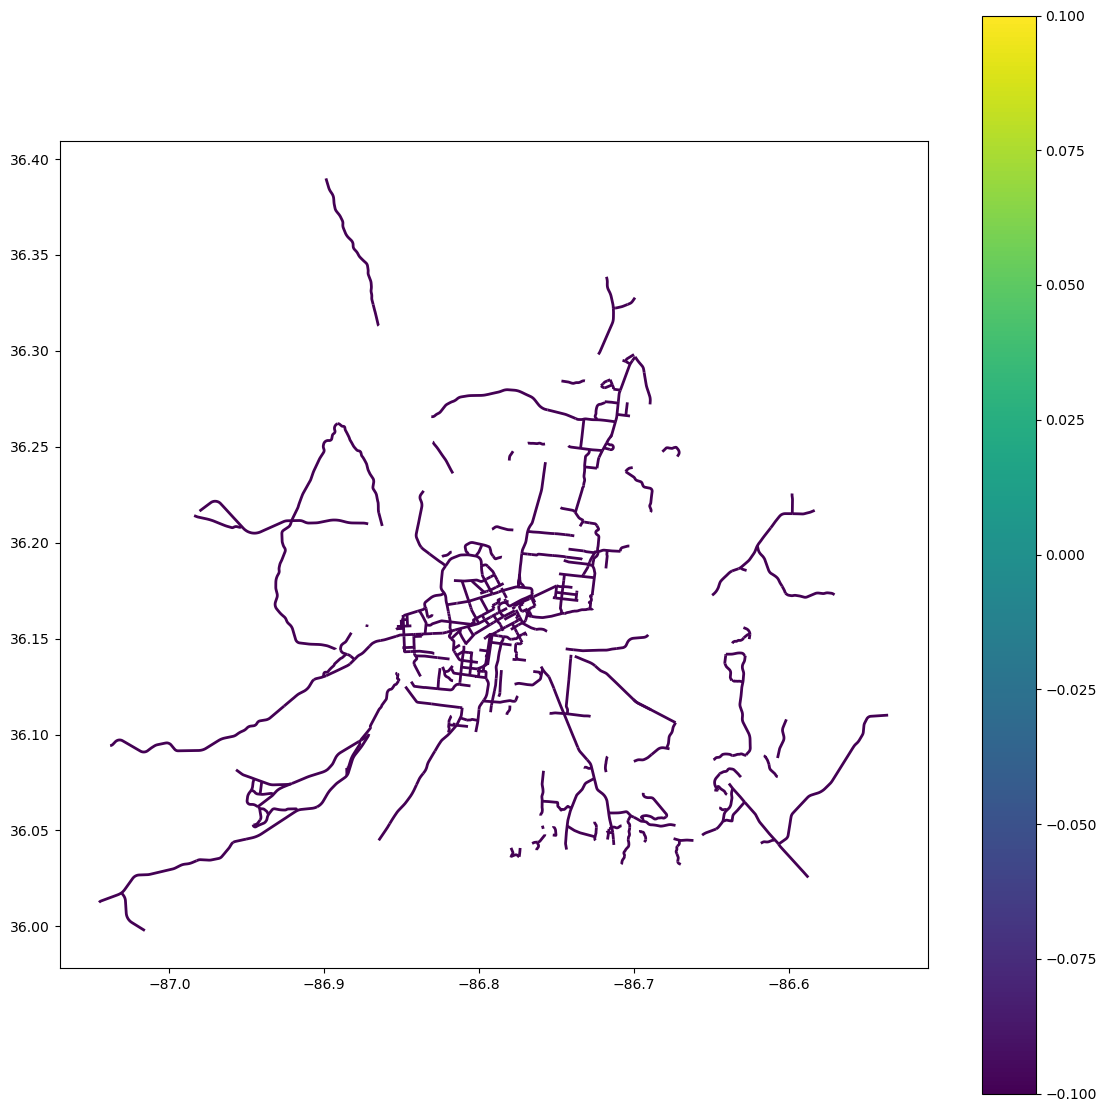

In [66]:
# color bikeways by rack count
bikeways.plot(
    column="rack_count",
    cmap="viridis",
    figsize=(14, 14),
    linewidth=2,
    legend=True
)

In [68]:
# convert to lat/lon
bikeways = bikeways.to_crs(epsg=4326)
bike_racks = bike_racks.to_crs(epsg=4326)

# map center
center = [
    bikeways.geometry.centroid.y.mean(),
    bikeways.geometry.centroid.x.mean()
]

# base map with background
m = folium.Map(
    location=center,
    zoom_start=12,
    tiles="CartoDB Positron"   # clean basemap
)

# bikeways layer
folium.GeoJson(bikeways, name="Bikeways").add_to(m)

# bike racks layer
folium.GeoJson(bike_racks, name="Bike Racks").add_to(m)

# toggle layers
folium.LayerControl().add_to(m)

m

C:\Users\matth\AppData\Local\Temp\ipykernel_17792\1046246497.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bikeways.geometry.centroid.y.mean(),
C:\Users\matth\AppData\Local\Temp\ipykernel_17792\1046246497.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bikeways.geometry.centroid.x.mean()


In [72]:
# drop missing geometries
bike_racks = bike_racks[bike_racks.geometry.notnull()]

# convert to lat/lon
bikeways = bikeways.to_crs(4326)
bike_racks = bike_racks.to_crs(4326)

# map center (simple version)
center = [
    bikeways.geometry.centroid.y.mean(),
    bikeways.geometry.centroid.x.mean()
]

# base map
m = folium.Map(location=center, zoom_start=12, tiles="CartoDB Positron")

# bikeways layer
folium.GeoJson(bikeways, name="Bikeways").add_to(m)

# adding small red pins for bike racks
for _, row in bike_racks.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=3,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.8
    ).add_to(m)

# layer toggle
folium.LayerControl().add_to(m)

m

C:\Users\matth\AppData\Local\Temp\ipykernel_17792\2784825440.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bikeways.geometry.centroid.y.mean(),
C:\Users\matth\AppData\Local\Temp\ipykernel_17792\2784825440.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bikeways.geometry.centroid.x.mean()
